* Independent Variables X
* Dependent Variable Y

* We assume that there is some relationship between X and Y in the general form of:

$y = f(x) +  \epsilon$
    
Where epsilon is Gaussian White noise $\epsilon=^{d} N(0, 1) $
We wish to estimate this with:

$ \hat{y} = \hat{f(x)}$


* Training observations ${(x_{1}, y_{1}), (x_{2}, y_{2}), ....,(x_{n}, y_{n})}$
* We compute: $ \hat{f(x_{1})},\hat{f(x_{2})}, ....,\hat{f(x_{n})}  $
* If these are approx. equal to $y_{1}, y_{2}, ...., y_{n}$ then the **Training MSE** will be small.

However, we are interested in how our model performs with ***unseen data*** which we will denote by $(x_{0}, y_{0})$ - this will serve as our **Test Oberservation**; which was not used to train the model; 
 * We want to choose the method / model that gives use the *lowest test MSE*



When we try to model $f(x)$ with $\hat(f(x))$, in the regression setting in particular, thoe most commonly used measure is the ***Mean-Squared Error***:

$ MSE = \frac{1}{n}\sum\limits_{i=1}^{n}(y_{i}-\hat{f(x_{i})})^2$



The Expected **Test** MSE can be shown, given a value $x_{0}$ to be:
 * The expected test MSE refers to the average test MSE that we would obtain if we repeatedly estimated $f$ using a large number of training sets and test each at $x_{0}$. The overall expected test MSE can be computed by averaging $E[(y_{0}-\hat{f(x_{0})})^2]$ over all possible values of $x_{0}$ in the test set.

$ E[(y_{0}-\hat{f(x_{0})})^2 | X] = Var(\hat{f(x_{0})}) + [Bias(\hat{f(x_{0})})]^2 + Var(\epsilon) $

where:

* $Var(\hat{f(x_{0})}) = E[(\hat{f(x_{0})}-E[\hat{f(x_{0})}])^2] $

* $Bias(\hat{f(x_{0})}) = E[\hat{f(x_{0})}] - \hat{f(x_{0})} $

* $ Var(\epsilon) = \sigma_{\epsilon} $

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def f(x):
    return .5 * x + np.sqrt(np.max(x, 0)) - np.cos(x) + 2

In [16]:
N = 1000
sigma_epsilon = 1
x_max = 3
x_test = 3.2
x = x_max * (2 * np.random.rand(N) - 1)
epsilon = sigma_epsilon * np.random.randn(N)

In [19]:
y = f(x) + epsilon
y_test = f(x_test) + sigma_epsilon*np.random.randn()

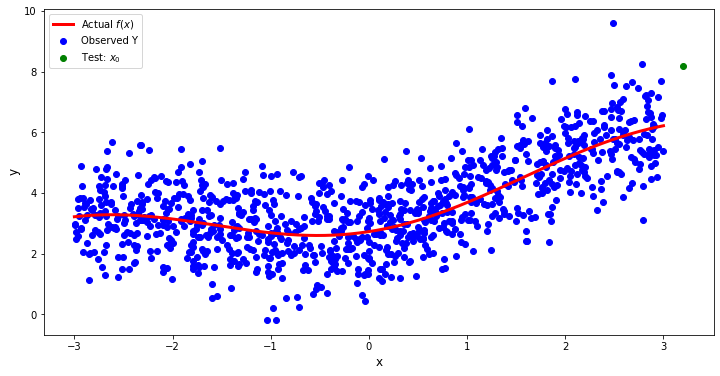

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
x_range = np.linspace(-x_max, x_max, 1000)

ax.scatter(x, y, c='b', label='Observed Y')
ax.plot(x_range, f(x_range), 'r', linewidth=3.0, label='Actual $f(x)$')
ax.scatter(x_test, y_test, c='g', label='Test: $x_0$')

ax.set_xlabel('x', size=12)
ax.set_ylabel('y', size=12)

ax.set_xticks(np.arange(-x_max, x_max + 1));

ax.legend(loc='upper left')



### Let us Model:
Try polynomials of various orders:

$ \hat{f(x)} = \beta_{0} + \beta_{1}x + \beta_{2}x^2 +....+\beta_{d}x^d $


In [32]:
def f_hat(x, B):
    d = len(B) - 1
    return np.sum(B * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

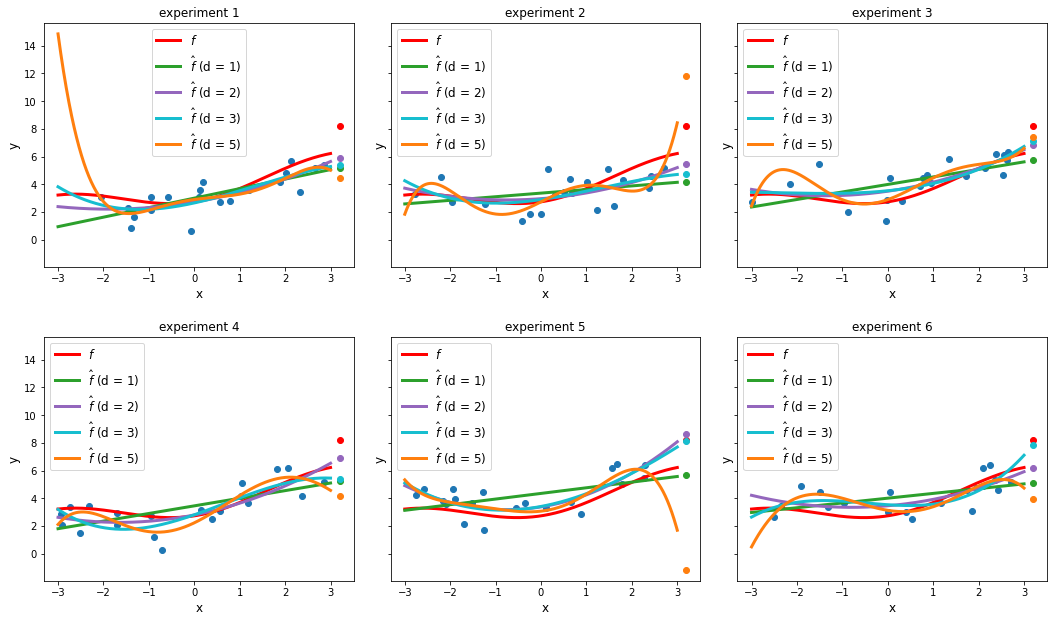

In [33]:
n = int(.02 * N)
x_test = 3.2
x_range = np.linspace(-x_max, x_max, 1000)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange'])
d_arr = [1, 2, 3, 5]

cnt = 1
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))

for i in range(2):
    for j in range(3):
        idx = np.random.permutation(N)[:n]
        x_train, y_train = x[idx], y[idx]
        
        B = []
        for d in d_arr:
            B.append(np.polyfit(x_train, y_train, d))
            
        axs[i, j].scatter(x_train, y_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        
        for k in range(len(B)):
            axs[i, j].plot(x_range, f_hat(x_range, B[k]), color=colors[k], linewidth=3.0)
            
        axs[i, j].scatter(x_test, y_test, c='r')
        
        for k in range(len(B)):
            axs[i, j].scatter(x_test, f_hat(x_test, B[k]), c=colors[k])
            
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)
        axs[i, j].legend([r'$f$', r'$\hat{f}$ (d = 1)', r'$\hat{f}$ (d = 2)', 
                          r'$\hat{f}$ (d = 3)', r'$\hat{f}$ (d = 5)'], fontsize=12)
        axs[i, j].title.set_text('experiment {}'.format(cnt))
        cnt+=1
        
fig.tight_layout(pad=2)



### Simulate 10,000 such experiments, by randomly sampling 20 points from the observed data.
 * On each experiment we learn a different $\hat{f}$ tied to that experiment's training data (20 points)
 * Then, for each of the $\hat{f}$ we evalute it for an unseen datapoint $x_{0}$ and thus get 10,000 $\hat{f(x_{0})}$.
 * We do this for d=1, d=2

In [62]:
R = 10000
d_arr = [1, 2, 3, 5]
y_hat_test = np.zeros((len(d_arr), R))

for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]
    
    for k in range(len(d_arr)):
        d = d_arr[k]
        B = np.polyfit(x_train, y_train, d)
        y_hat_test[k, r] = f_hat(x_test, B)

In [63]:
y_hat_test_mean = np.mean(y_hat_test, 1)
y_hat_test_std = np.std(y_hat_test, 1)
x_test = 3.2

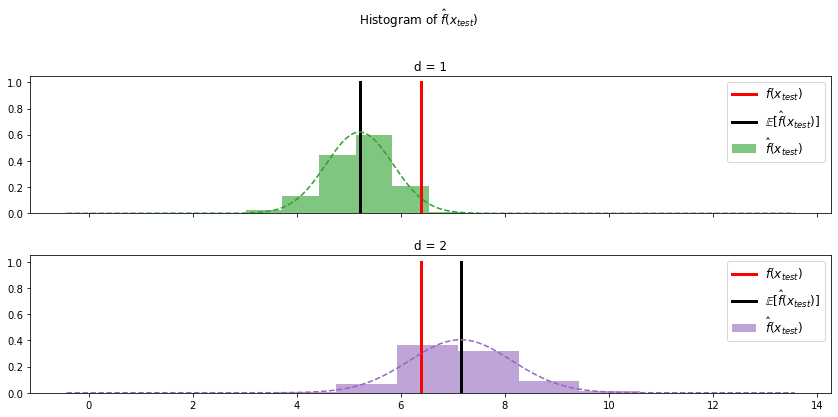

In [70]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))

for k in range(2):
    axs[k].hist(y_hat_test[k], density=True, color=colors[k], alpha=0.6)
    
    xlim = axs[k].get_xlim()
    axs[k].plot([f(x_test), f(x_test)], [0, 1], 'r', linewidth=3.0)
    axs[k].plot([y_hat_test_mean[k], y_hat_test_mean[k]], [0, 1], c='k', linewidth=3.0)
    
    axs[k].title.set_text('d = {}'.format(d_arr[k]))
    axs[k].legend([r'$f(x_{test})$', r'$\mathbb{E}[\hat{f}(x_{test})]$', r'$\hat{f}(x_{test})$'], fontsize=12)
    
for k in range(2):
    x_range = np.linspace(xlim[0], xlim[1], 1000)
    axs[k].plot(x_range, stats.norm.pdf(x_range, y_hat_test_mean[k], y_hat_test_std[k]), color=colors[k], ls='--')
    
fig.suptitle(r"Histogram of $\hat{f}(x_{test})$", size=12)
fig.tight_layout(pad=2)


In [71]:
R = 10000  # simulate 10,000 experiments
n = int(0.02 * N)  # each of size 20
n_test = 1000  # test 1,000 test points
d_arr = np.arange(5)

x_test = x_max + np.random.randn(n_test) -0.5 # shape: (n_test, )
epsilon = sigma_epsilon * np.random.randn(n_test)
y_test = f(x_test) + epsilon

train_squared_error = np.zeros((len(d_arr), R))
y_hat_test = np.zeros((len(d_arr), R, n_test))  # (d, R, n_test)

In [72]:
for r in range(R):
    n = int(0.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]
    for k in range(len(d_arr)):
        d = d_arr[k]
        B = np.polyfit(x_train, y_train, d)
        train_squared_error[k, r] = np.mean((y_train - f_hat(x_train, B)) ** 2)  # Train MSE
        y_hat_test[k, r, :] = f_hat(x_test, B)
        
test_squared_error = np.mean((y_hat_test - y_test) ** 2, 1)  # (len(d_arr), n_test) 
bias_squared = (np.mean(y_hat_test, 1)- f(x_test)) ** 2  # (len(d_arr), n_test)
var_y_hat_test = np.var(y_hat_test, 1)  # as above


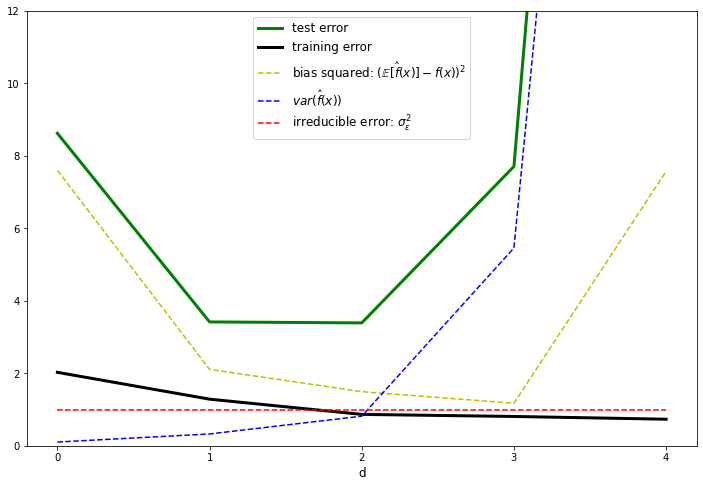

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(d_arr, np.mean(test_squared_error, 1), 'g', lw=3.0);
ax.plot(d_arr, np.mean(train_squared_error, 1), 'k', lw=3.0);
ax.plot(d_arr, np.mean(bias_squared, 1), 'y--');
ax.plot(d_arr, np.mean(var_y_hat_test, 1), 'b--');

ax.plot(d_arr, (sigma_epsilon**2)*np.ones_like(d_arr), 'r--')

ax.set_xticks(d_arr)
ax.set_xlabel('d', size=12)

ax.legend(['test error', 'training error', r'bias squared: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$',
            r'$var(\hat{f}(x))$', r'irreducible error: $\sigma_\epsilon^2$'], loc='upper center', fontsize=12)

ax.set_ylim([0, 12]);